In [1]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
from operator import attrgetter
from scipy.stats import ttest_ind, pearsonr, gamma, normaltest

sns.set_context("paper", font_scale=2)

# Содержание

Данный ноутбук содержит домашние задания на первые четыре дня интенсива "Погружение в A/B-тестирование".

Для каждого дня и темы вам предоставлен код из соответствующей демонстрации. Для выполнения задания вам нужно произвести соответствующие изменения в существующем коде, чтобы он подходил под условия задания. Некоторые из мест, которые нужно изменить, вы можете найти по комментарию **#TODO**. Остальные места для изменения кода вам нужно найти самостоятельно.

Вопросы в рамках одной темы нужно выполнять последовательно, т.к. результаты последующих заданий зависят от расчетов предыдущих заданий.

## Практическое задание 1 "Расчет размера данных для эксперимента по формуле"

Рассчитайте требуемое количество наблюдений для каждой из групп при следующих условиях эксперимента:
- Ошибка I рода = 0.03;
- Ошибка II рода = 0.2;
- Эффект = 5;
- Стандартное отклонение = 200.

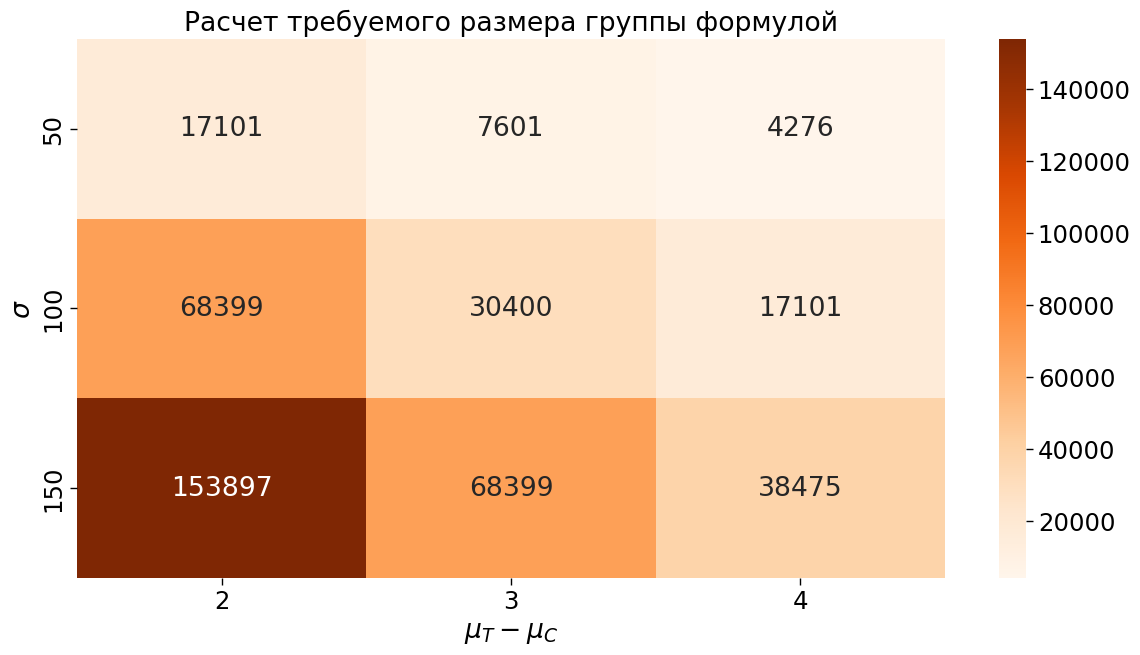

требуемое количество наблюдений: 23718


In [3]:
# sigmas - стандартные отклонения
sigmas = list(range(50, 200, 50))
# effect_sizes - эффекты
effect_sizes = list(range(2, 5, 1))

ns_ = []
sg_ = []
es_ = []

alpha = 0.05 # type I error
beta = 0.02   # type II error

for sigma in sigmas:
    for effect_size in effect_sizes:
        sg_.append(sigma)
        es_.append(effect_size)
        
        k = abs(norm.ppf(1-alpha)) + abs(norm.ppf(1-beta)) 
        n = int(round(2 * k**2 * sigma ** 2 / effect_size ** 2, 0) + 1)
        ns_.append(n)
        
data_ = pd.DataFrame({
    'sigma': sg_,
    'effect_size': es_,
    'sample_size': ns_
})


data_pivot_ = data_.pivot(index='sigma', columns='effect_size', values='sample_size')

plt.figure(figsize=(14, 7))
sns.heatmap(data_pivot_, cmap='Oranges', annot=True, fmt='g')
# sns.set(font_scale=2)
plt.title('Расчет требуемого размера группы формулой')
plt.xlabel(r'$\mu_T - \mu_C$')
plt.ylabel(r'$\sigma$')
plt.show()

# Заданные условия эксперимента
alpha = 0.03  # Ошибка I рода
beta = 0.2    # Ошибка II рода
effect_size = 5  # Эффект
sigma = 200  # Стандартное отклонение

# Расчёт критических значений
k = abs(norm.ppf(1 - alpha)) + abs(norm.ppf(1 - beta))
# Расчёт необходимого размера выборки для каждой группы
n = int(round(2 * k**2 * sigma**2 / effect_size**2, 0) + 1)
print("требуемое количество наблюдений:", n)

## Практическое задание 2 "Расчет размера групп для произвольного распределения"

Какая будет фактическая ошибка 2 рода при следующих параметрах:
- Метрика: медиана
- Increment: 0.1
- Sample_size: 3000

Все остальное оставляем неизменным.

Гипотеза для теста: мы изначально верим в то, что метрика сдвинется “вправо” или как минимум не изменится. Что в таком случае нужно изменить в коде?

**Важно:** чтобы получить корректный ответ, оставьте только нужный increment и sample_size в списке эффектов и размеров групп, таким образом, должен остаться только один элемент как в списке эффектов, так и в списке размеров групп.

0.03 2000
0.03 3000
0.03 4000
0.03 5000
0.035 2000
0.035 3000
0.035 4000
0.035 5000
0.04 2000
0.04 3000
0.04 4000
0.04 5000
0.045 2000
0.045 3000
0.045 4000
0.045 5000
0.05 2000
0.05 3000
0.05 4000
0.05 5000


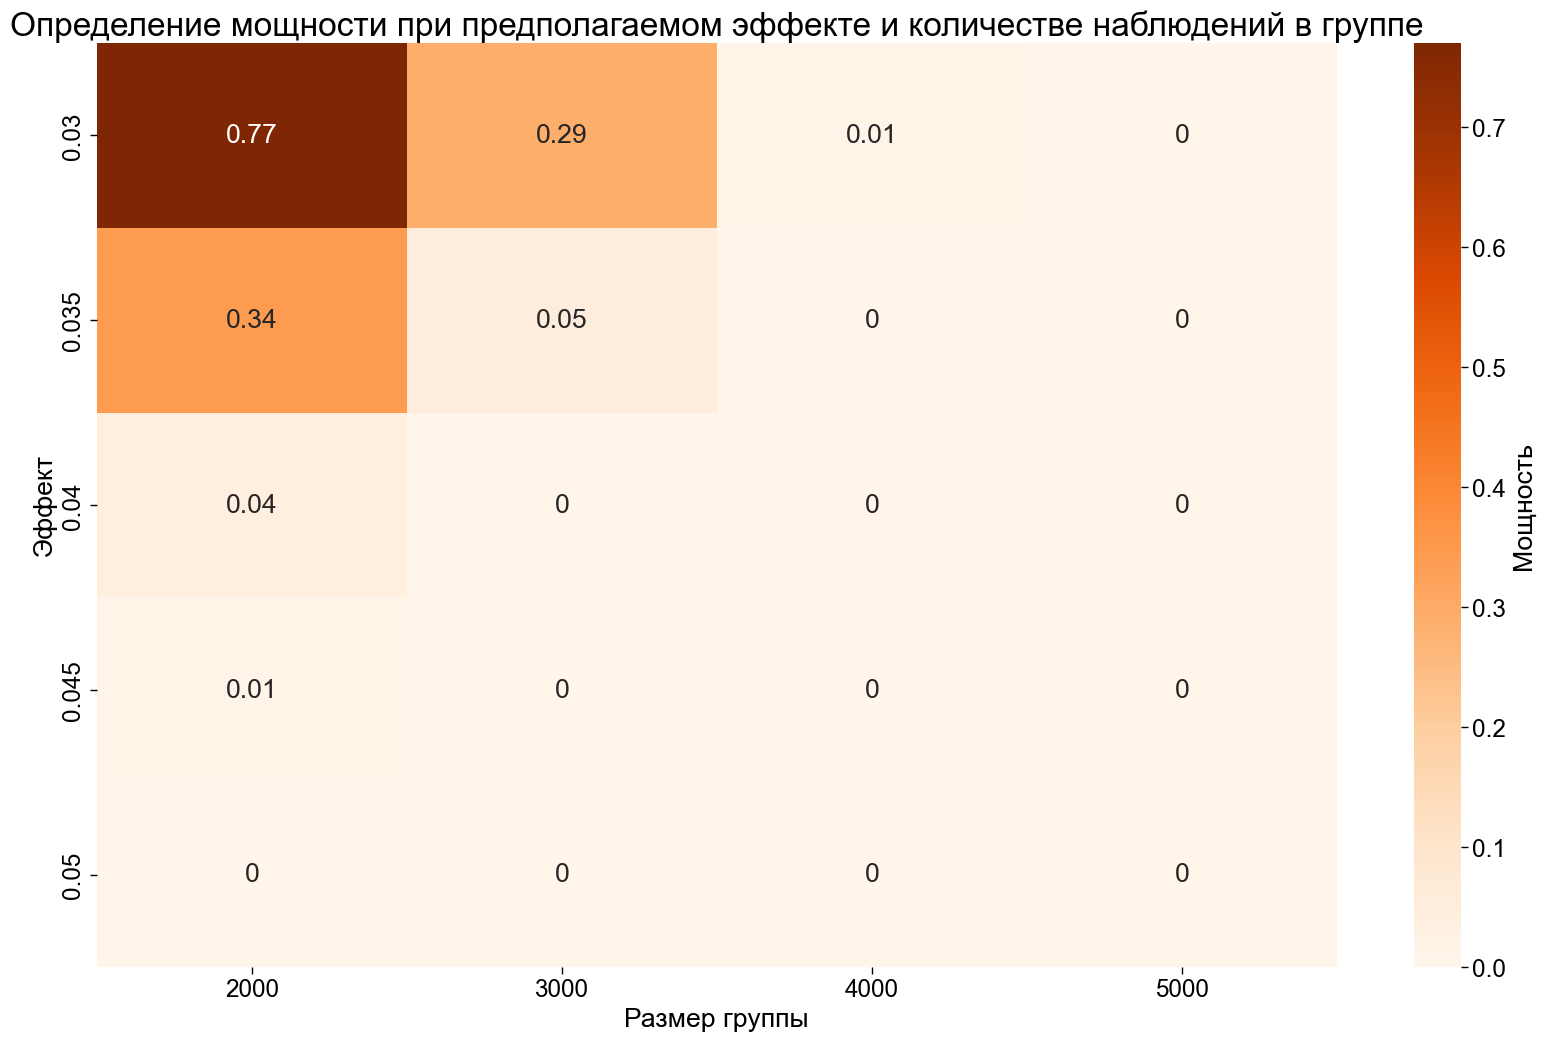

In [4]:
np.random.seed(42)

n_iter = 100
boot_samples = 100
increments = [0.030, 0.035, 0.04, 0.045, 0.05]       # TODO: внесите нужный increment
sample_sizes = [2000, 3000, 4000, 5000]              # TODO: внесите нужный sample_size

increments_m = []
shares_m = []
powers_m = []
sample_sizes_m = []


def metric(nums) -> float:
    return np.quantile(nums, 0.1)                    # TODO: поменяйте метрику на требуемую

alpha = 0.05
beta = 0.2
power = 1 - beta

for inc in increments:
    for sample_size in sample_sizes:
        print(inc, sample_size)
        rejected = 0
        for i in range(n_iter):
            boot_diffs = []
            for boot_sample in range(boot_samples):
                control = np.random.gamma(1, 2, size=sample_size)
                treatment = np.random.gamma(1, 2, size=sample_size) + inc

                diff_value = metric(treatment) - metric(control)
                boot_diffs.append(diff_value)
                
            q = np.quantile(boot_diffs, alpha)
            if q < 0:
                rejected += 1 # reject null hypothesi
            
        proportion = rejected / n_iter # truly rejected, must be 1 - beta
        
        increments_m.append(inc)
        sample_sizes_m.append(sample_size)
        powers_m.append(proportion)


data = pd.DataFrame({
    'increment': increments_m,
    'sample_size': sample_sizes_m,
    'power': powers_m
})

data_pivot = data.pivot(index='increment', columns='sample_size', values='power')

plt.figure(figsize=(20, 12))
sns.heatmap(data_pivot, cmap='Oranges', annot=True, fmt='g', cbar_kws={'label': 'Мощность'})
sns.set(font_scale=2)
plt.title('Определение мощности при предполагаемом эффекте и количестве наблюдений в группе')
plt.xlabel('Размер группы')
plt.ylabel('Эффект')
plt.show()

0.1 3000


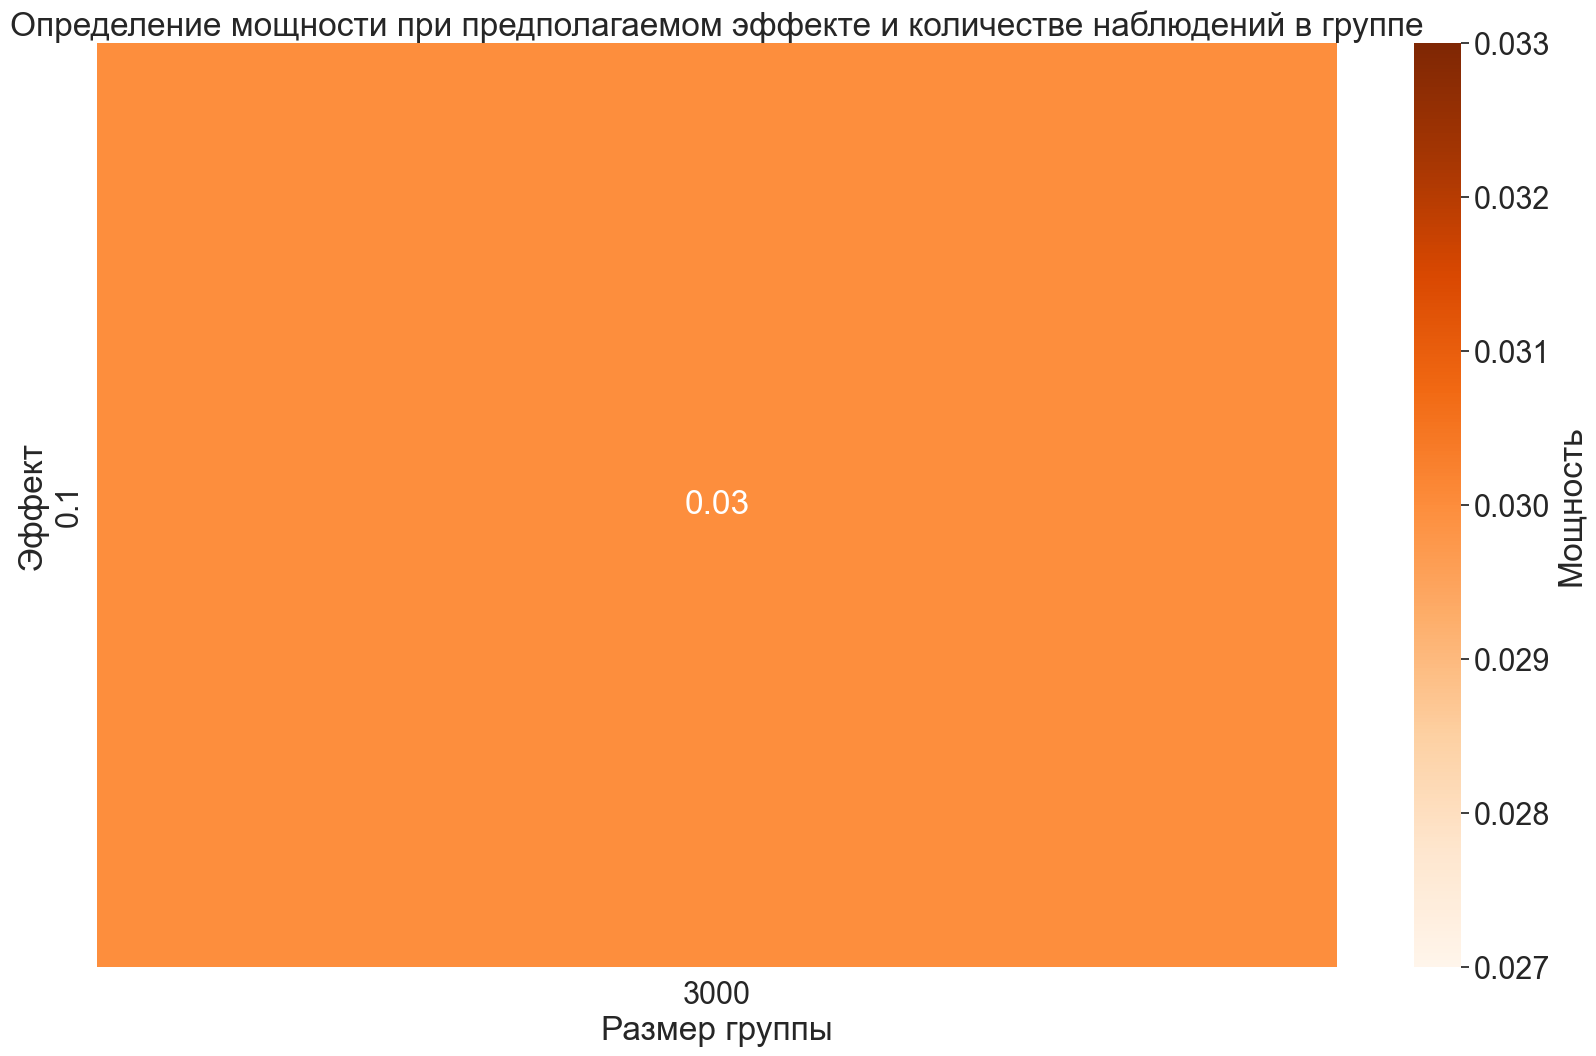

In [5]:
np.random.seed(42)

n_iter = 100
boot_samples = 100
increments = [0.1]       # TODO: внесите нужный increment
sample_sizes = [3000]              # TODO: внесите нужный sample_size

increments_m = []
shares_m = []
powers_m = []
sample_sizes_m = []


def metric(nums) -> float:
    return np.median(nums)                    # TODO: поменяйте метрику на требуемую

alpha = 0.05
beta = 0.2
power = 1 - beta

for inc in increments:
    for sample_size in sample_sizes:
        print(inc, sample_size)
        rejected = 0
        for i in range(n_iter):
            boot_diffs = []
            for boot_sample in range(boot_samples):
                control = np.random.gamma(1, 2, size=sample_size)
                treatment = np.random.gamma(1, 2, size=sample_size) + inc

                diff_value = metric(treatment) - metric(control)
                boot_diffs.append(diff_value)

            q = np.quantile(boot_diffs, alpha)
            if q < 0:
                rejected += 1 # reject null hypothesi

        proportion = rejected / n_iter # truly rejected, must be 1 - beta

        increments_m.append(inc)
        sample_sizes_m.append(sample_size)
        powers_m.append(proportion)


data = pd.DataFrame({
    'increment': increments_m,
    'sample_size': sample_sizes_m,
    'power': powers_m
})

data_pivot = data.pivot(index='increment', columns='sample_size', values='power')

plt.figure(figsize=(20, 12))
sns.heatmap(data_pivot, cmap='Oranges', annot=True, fmt='g', cbar_kws={'label': 'Мощность'})
sns.set(font_scale=2)
plt.title('Определение мощности при предполагаемом эффекте и количестве наблюдений в группе')
plt.xlabel('Размер группы')
plt.ylabel('Эффект')
plt.show()

фактическая ошибка 2 рода - 0.03